<h2><FONT COLOR=RED>IMPORTING THE DEPENDENCIES

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import linear_model 
from sklearn import preprocessing 
from sklearn import metrics
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

<h2><FONT COLOR=RED> DATA COLLECTION & START THE PROCESSING

In [3]:
# loading the data to a pandas dataset
df=pd.read_csv("F:/ML/loan_data_set.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
# Number of rows & columns in the dataset
df.shape

(614, 13)

In [5]:
#Defining numeric column
cols = df.columns
num_cols = df._get_numeric_data().columns
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [6]:
#Listed columns
list(set(cols) - set(num_cols))

['Self_Employed',
 'Married',
 'Loan_Status',
 'Loan_ID',
 'Property_Area',
 'Dependents',
 'Education',
 'Gender']

In [7]:
#Defining the discrete & continuous variable
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    unique_values = df[col].nunique()
    if unique_values <=10:
        print(f"{col} is a discrete variable with {unique_values} unique values.")
    else:
        print(f"{col} is a continuous variable.")

ApplicantIncome is a continuous variable.
CoapplicantIncome is a continuous variable.
LoanAmount is a continuous variable.
Loan_Amount_Term is a discrete variable with 10 unique values.
Credit_History is a discrete variable with 2 unique values.


In [8]:
# Identify the unique lables of each columns
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    unique_labels = df[col].unique()
    print(f"Unique labels for {col}:")
    for label in unique_labels:
        print(label)
    print('\n')

Unique labels for Loan_ID:
LP001002
LP001003
LP001005
LP001006
LP001008
LP001011
LP001013
LP001014
LP001018
LP001020
LP001024
LP001027
LP001028
LP001029
LP001030
LP001032
LP001034
LP001036
LP001038
LP001041
LP001043
LP001046
LP001047
LP001050
LP001052
LP001066
LP001068
LP001073
LP001086
LP001087
LP001091
LP001095
LP001097
LP001098
LP001100
LP001106
LP001109
LP001112
LP001114
LP001116
LP001119
LP001120
LP001123
LP001131
LP001136
LP001137
LP001138
LP001144
LP001146
LP001151
LP001155
LP001157
LP001164
LP001179
LP001186
LP001194
LP001195
LP001197
LP001198
LP001199
LP001205
LP001206
LP001207
LP001213
LP001222
LP001225
LP001228
LP001233
LP001238
LP001241
LP001243
LP001245
LP001248
LP001250
LP001253
LP001255
LP001256
LP001259
LP001263
LP001264
LP001265
LP001266
LP001267
LP001273
LP001275
LP001279
LP001280
LP001282
LP001289
LP001310
LP001316
LP001318
LP001319
LP001322
LP001325
LP001326
LP001327
LP001333
LP001334
LP001343
LP001345
LP001349
LP001350
LP001356
LP001357
LP001367
LP001369
LP001370
L

In [9]:
# Range of each columns
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    min_val = df[col].min()
    max_val = df[col].max()
    print(f"Range for {col}: {min_val} to {max_val}")

Range for ApplicantIncome: 150 to 81000
Range for CoapplicantIncome: 0.0 to 41667.0
Range for LoanAmount: 9.0 to 700.0
Range for Loan_Amount_Term: 12.0 to 480.0
Range for Credit_History: 0.0 to 1.0


In [10]:
#Statistical measures
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
#Checking the missing values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
#Find the percentage of null values
percent=df.isnull().sum()*100/len(df)

In [13]:
percent

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [14]:
#Drop the missing values
df=df.dropna()
df[:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [15]:
#Show the number of row & column
df.shape

(480, 13)

In [16]:
#Number of missing values in each columns
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
#Convert Categorical values to numerical values
df.replace({'Loan_Status':{'N':0,'Y':1},'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

C:\Users\manami sarkar\AppData\Local\Temp\ipykernel_25444\2105179451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Loan_Status':{'N':0,'Y':1},'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)


In [18]:
df[:3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1


In [19]:
#Show the number of rows & columns
df.shape

(480, 13)

In [20]:
#Changing the values
df.columns=['L_id','Sex','Marr','Depen','Edu','self_emp','App_inc','Coapp_inc','L_amt','amtterm','cdt_hist','Prob_area','L_status']
df.head()

,L_id,Sex,Marr,Depen,Edu,self_emp,App_inc,Coapp_inc,L_amt,amtterm,cdt_hist,Prob_area,L_status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [21]:
df=pd.get_dummies(df,drop_first=True,columns=['Depen'],dtype=np.int64)
df[:5]

,L_id,Sex,Marr,Edu,self_emp,App_inc,Coapp_inc,L_amt,amtterm,cdt_hist,Prob_area,L_status,Depen_1,Depen_2,Depen_3+
1,LP001003,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,1,0,0
2,LP001005,1,1,1,1,3000,0.0,66.0,360.0,1.0,2,1,0,0,0
3,LP001006,1,1,0,0,2583,2358.0,120.0,360.0,1.0,2,1,0,0,0
4,LP001008,1,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,0,0,0
5,LP001011,1,1,1,1,5417,4196.0,267.0,360.0,1.0,2,1,0,1,0


In [22]:
df.shape

(480, 15)

<h2><font color=red>PLOTING

<AxesSubplot:xlabel='Edu', ylabel='count'>

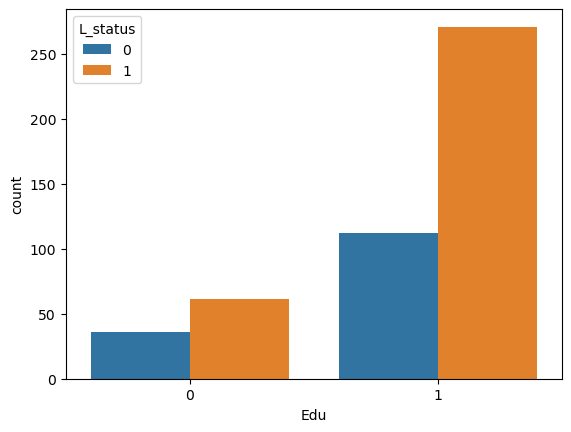

In [23]:
# Education and Loan status
sns.countplot(x='Edu',hue='L_status',data=df)

<AxesSubplot:xlabel='count', ylabel='Depen_1'>

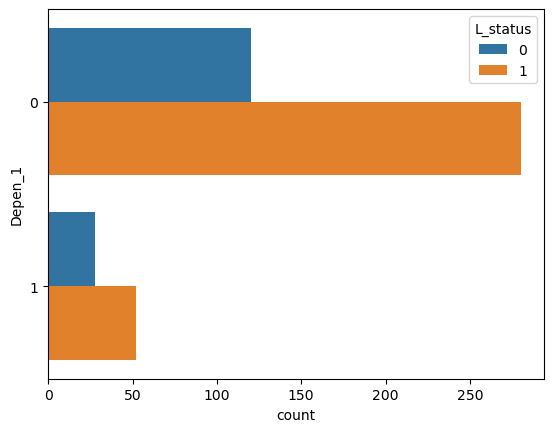

In [24]:
#Dependent & Loan status
sns.countplot(y='Depen_1',hue='L_status',data=df)

<AxesSubplot:xlabel='count', ylabel='Depen_2'>

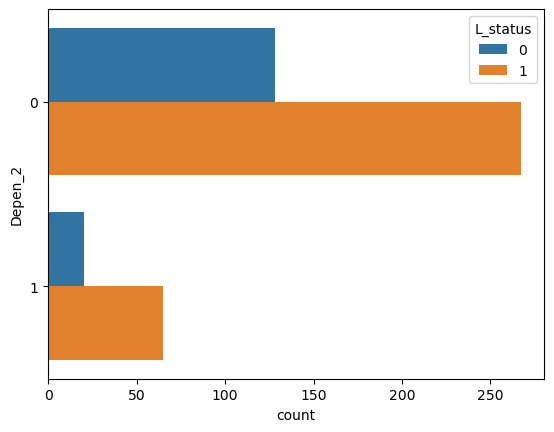

In [25]:
sns.countplot(y='Depen_2',hue='L_status',data=df)

<AxesSubplot:xlabel='count', ylabel='Depen_3+'>

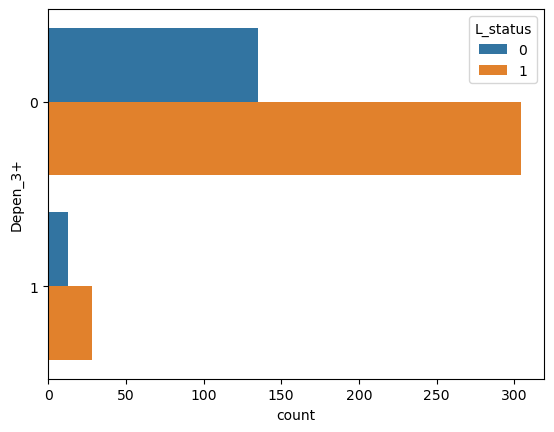

In [26]:
sns.countplot(y='Depen_3+',hue='L_status',data=df)

<AxesSubplot:xlabel='self_emp', ylabel='count'>

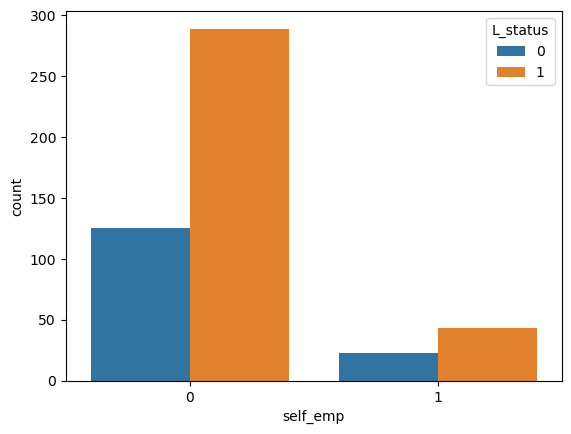

In [27]:
#Self_Employee & Loan Status
sns.countplot(x='self_emp',hue='L_status',data=df)

<AxesSubplot:xlabel='cdt_hist', ylabel='count'>

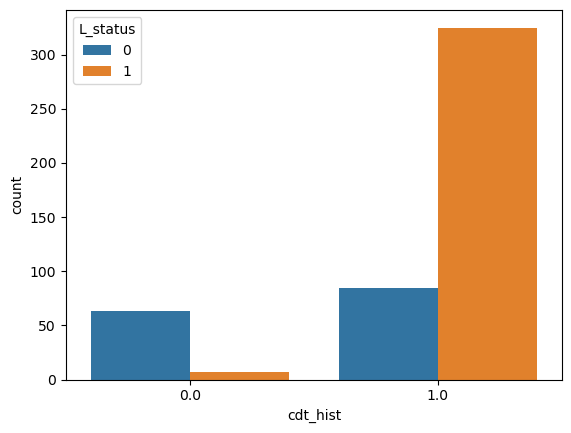

In [28]:
#Credit History & Loan Status
sns.countplot(x='cdt_hist',hue='L_status',data=df)

<AxesSubplot:xlabel='Prob_area', ylabel='count'>

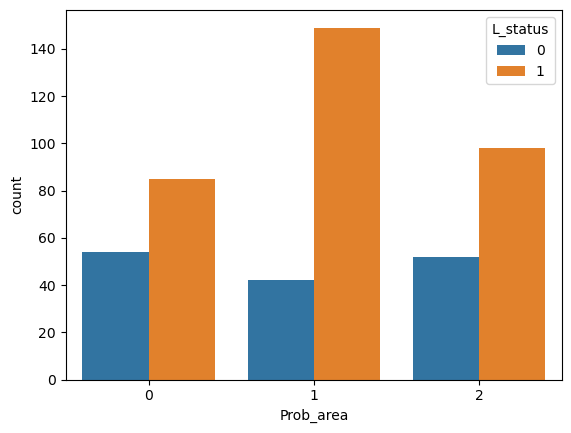

In [29]:
#Property Area & Loan status
sns.countplot(x='Prob_area',hue='L_status',data=df)

<AxesSubplot:xlabel='App_inc'>

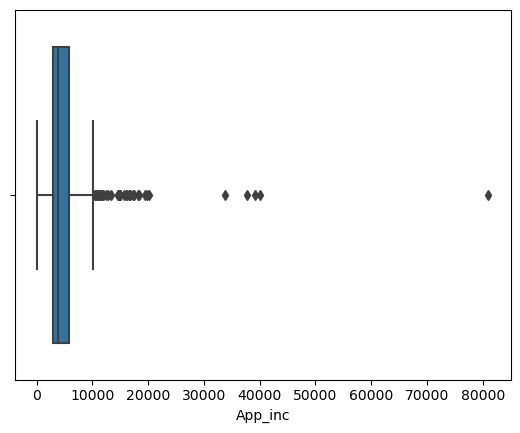

In [30]:
#Applicant income & Loan Status
sns.boxplot(x='App_inc',hue='L_status',data=df)

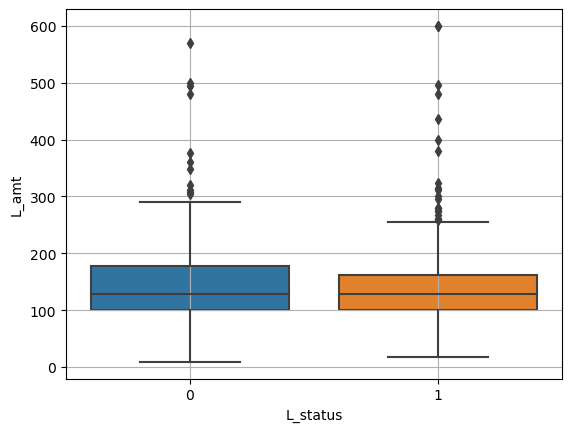

In [31]:
#Loan Amount & Loan Status
sns.boxplot(y="L_amt",x="L_status",data=df)
plt.grid(True)

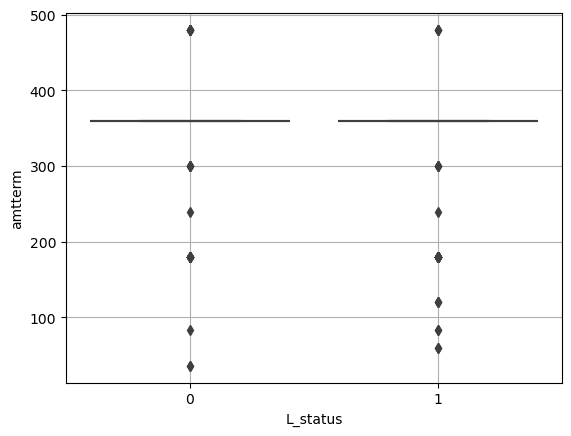

In [32]:
#Loan Amount term  & Loan Status
sns.boxplot(y="amtterm",x="L_status",data=df)
plt.grid(True)

<h2><font color=red>SEPARATING THE DATA & LABEL

In [33]:
X=df.drop(columns=['L_id','L_status'],axis=1)

In [34]:
y=df['L_status']

In [35]:
print(X)

     Sex  Marr  Edu  self_emp  App_inc  Coapp_inc  L_amt  amtterm  cdt_hist  \
1      1     1    1         0     4583     1508.0  128.0    360.0       1.0   
2      1     1    1         1     3000        0.0   66.0    360.0       1.0   
3      1     1    0         0     2583     2358.0  120.0    360.0       1.0   
4      1     0    1         0     6000        0.0  141.0    360.0       1.0   
5      1     1    1         1     5417     4196.0  267.0    360.0       1.0   
..   ...   ...  ...       ...      ...        ...    ...      ...       ...   
609    0     0    1         0     2900        0.0   71.0    360.0       1.0   
610    1     1    1         0     4106        0.0   40.0    180.0       1.0   
611    1     1    1         0     8072      240.0  253.0    360.0       1.0   
612    1     1    1         0     7583        0.0  187.0    360.0       1.0   
613    0     0    1         1     4583        0.0  133.0    360.0       0.0   

     Prob_area  Depen_1  Depen_2  Depen_3+  
1     

In [36]:
print(y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: L_status, Length: 480, dtype: int64


<H2><FONT COLOR=RED>TRAIN TEST SPLIT

In [37]:
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.1,random_state=42)

In [38]:
print(X.shape,Xtrain.shape,Xtest.shape)

(480, 13) (432, 13) (48, 13)


<H2><FONT COLOR=RED>TRAINING THE MODEL

In [39]:
model=svm.SVC()

In [40]:
#Training the support vector machine model
model.fit(Xtrain, ytrain)

SVC()

<H2><FONT COLOR=RED>MODEL EVOLUTION

In [41]:
 #Accuracy score on training data
accuracy = accuracy_score(ytrain, model.predict(Xtrain))
precision = precision_score(ytrain, model.predict(Xtrain))
recall = recall_score(ytrain, model.predict(Xtrain))
f1 = f1_score(ytrain, model.predict(Xtrain))
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7013888888888888
Precision: 0.6993006993006993
Recall: 1.0
F1 Score: 0.823045267489712


In [42]:
#Accuracy score on test data
y_pred = model.predict(Xtest)
accuracy = accuracy_score(ytest, y_pred)   #for y
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6666666666666666
Precision: 0.6666666666666666
Recall: 1.0
F1 Score: 0.8


<H2><FONT COLOR=RED>DECISION TREE

In [43]:
model=tree.DecisionTreeClassifier(random_state=42)
model.fit(Xtrain,ytrain)
predtrain=model.predict(Xtrain)
predtest=model.predict(Xtest)

In [44]:
def printscores(act,pred):
    print("accuracy :",metrics.accuracy_score(act,pred))
    print("recall :",metrics.recall_score(act,pred))
    print("precision :",metrics.precision_score(act,pred))
    print("f1 :",metrics.f1_score(act,pred))
    print("AUC :",metrics.roc_auc_score(act,pred))

In [45]:
print("TRAINING METRICS:-")
printscores(ytrain,predtrain)
print("============================")
print("TEST METRICS:-")
printscores(ytest,predtest)

TRAINING METRICS:-
accuracy : 1.0
recall : 1.0
precision : 1.0
f1 : 1.0
AUC : 1.0
TEST METRICS:-
accuracy : 0.75
recall : 0.90625
precision : 0.7631578947368421
f1 : 0.8285714285714286
AUC : 0.671875


In [46]:
# Get the feature names
feature_names = X.columns

# Instantiate and train a Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Create a feature selector based on feature importances
selector = SelectFromModel(model, threshold=0.05, prefit=True)  # Adjust the threshold as needed

# Transform the feature matrix to select important features
X_selected = selector.transform(X)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_features = feature_names[selected_indices]

# Create a new DataFrame with only the selected features
df_selected = df[selected_features]

C:\Users\manami sarkar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [47]:
# Print the selected feature names
print("Selected Features:")
for feature in selected_features:
    print(feature)

Selected Features:
App_inc
Coapp_inc
L_amt
cdt_hist


In [48]:
X_selected = df_selected.values  # Convert the selected features DataFrame to numpy array
y = df['L_status'].values  # Get the target variable as numpy array

In [49]:
Xtrain_selected, Xtest_selected, ytrain, ytest = train_test_split(X_selected, y, test_size=0.1, random_state=42)
model_selected = DecisionTreeClassifier(random_state=42)
model_selected.fit(Xtrain_selected, ytrain)

DecisionTreeClassifier(random_state=42)

In [50]:
predtrain_selected = model_selected.predict(Xtrain_selected)
predtest_selected = model_selected.predict(Xtest_selected)

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_train = accuracy_score(ytrain, predtrain_selected)
precision_train = precision_score(ytrain, predtrain_selected)
recall_train = recall_score(ytrain, predtrain_selected)
f1_train = f1_score(ytrain, predtrain_selected)

accuracy_test = accuracy_score(ytest, predtest_selected)
precision_test = precision_score(ytest, predtest_selected)
recall_test = recall_score(ytest, predtest_selected)
f1_test = f1_score(ytest, predtest_selected)

print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print("============================")
print("Testing Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)

Training Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Testing Metrics:
Accuracy: 0.7916666666666666
Precision: 0.8055555555555556
Recall: 0.90625
F1 Score: 0.8529411764705882


<H2><FONT COLOR=RED>LOGISTIC REGRESSION

In [52]:
from sklearn.linear_model import LogisticRegression#OK

# Instantiate and train a Logistic Regression model
model_lr_selected = LogisticRegression(random_state=42)
model_lr_selected.fit(Xtrain_selected, ytrain)

# Make predictions on the training and testing sets
predtrain_lr_selected = model_lr_selected.predict(Xtrain_selected)
predtest_lr_selected = model_lr_selected.predict(Xtest_selected)

# Evaluate the model using the selected features
accuracy_train_lr = accuracy_score(ytrain, predtrain_lr_selected)
precision_train_lr = precision_score(ytrain, predtrain_lr_selected)
recall_train_lr = recall_score(ytrain, predtrain_lr_selected)
f1_train_lr = f1_score(ytrain, predtrain_lr_selected)

accuracy_test_lr = accuracy_score(ytest, predtest_lr_selected)
precision_test_lr = precision_score(ytest, predtest_lr_selected)
recall_test_lr = recall_score(ytest, predtest_lr_selected)
f1_test_lr = f1_score(ytest, predtest_lr_selected)

print("Logistic Regression - Training Metrics:")
print("Accuracy:", accuracy_train_lr)
print("Precision:", precision_train_lr)
print("Recall:", recall_train_lr)
print("F1 Score:", f1_train_lr)
print("============================")
print("Logistic Regression - Testing Metrics:")
print("Accuracy:", accuracy_test_lr)
print("Precision:", precision_test_lr)
print("Recall:", recall_test_lr)
print("F1 Score:", f1_test_lr)

Logistic Regression - Training Metrics:
Accuracy: 0.8101851851851852
Precision: 0.7961956521739131
Recall: 0.9766666666666667
F1 Score: 0.877245508982036
Logistic Regression - Testing Metrics:
Accuracy: 0.8125
Precision: 0.7804878048780488
Recall: 1.0
F1 Score: 0.8767123287671234


<h2><FONT COLOR=RED>RANDOM FOREST

In [53]:
model=ensemble.RandomForestClassifier(random_state=42,n_estimators=200)

In [54]:
model.fit(Xtrain_selected,ytrain)

RandomForestClassifier(n_estimators=200, random_state=42)

In [55]:
len(model.estimators_)

200

In [56]:
predtrain=model.predict(Xtrain_selected)
predtest=model.predict(Xtest_selected)
print("TRANING METRICS:-")
printscores(ytrain,predtrain)
print("============================")
print("TEST METRICS:-")
printscores(ytest,predtest)

TRANING METRICS:-
accuracy : 1.0
recall : 1.0
precision : 1.0
f1 : 1.0
AUC : 1.0
TEST METRICS:-
accuracy : 0.7916666666666666
recall : 0.9375
precision : 0.7894736842105263
f1 : 0.8571428571428572
AUC : 0.71875


In [57]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate and train a Random Forest model
model_rf_selected = RandomForestClassifier(random_state=42)
model_rf_selected.fit(Xtrain_selected, ytrain)

# Make predictions on the training and testing sets
predtrain_rf_selected = model_rf_selected.predict(Xtrain_selected)
predtest_rf_selected = model_rf_selected.predict(Xtest_selected)

# Evaluate the model using the selected features
accuracy_train_rf = accuracy_score(ytrain, predtrain_rf_selected)
precision_train_rf = precision_score(ytrain, predtrain_rf_selected)
recall_train_rf = recall_score(ytrain, predtrain_rf_selected)
f1_train_rf = f1_score(ytrain, predtrain_rf_selected)

accuracy_test_rf = accuracy_score(ytest, predtest_rf_selected)
precision_test_rf = precision_score(ytest, predtest_rf_selected)
recall_test_rf = recall_score(ytest, predtest_rf_selected)
f1_test_rf = f1_score(ytest, predtest_rf_selected)

print("Random Forest - Training Metrics:")
print("Accuracy:", accuracy_train_rf)
print("Precision:", precision_train_rf)
print("Recall:", recall_train_rf)
print("F1 Score:", f1_train_rf)
print("============================")
print("Random Forest - Testing Metrics:")
print("Accuracy:", accuracy_test_rf)
print("Precision:", precision_test_rf)
print("Recall:", recall_test_rf)
print("F1 Score:", f1_test_rf)

Random Forest - Training Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Random Forest - Testing Metrics:
Accuracy: 0.7916666666666666
Precision: 0.7894736842105263
Recall: 0.9375
F1 Score: 0.8571428571428572


<H2><FONT COLOR=RED>SUMMARY TABLE

In [58]:
# Create a summary table
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results.loc[0] = ['Decision Tree', accuracy_train, precision_train, recall_train, f1_train]
results.loc[1] = ['Decision Tree (Test)', accuracy_test, precision_test, recall_test, f1_test]
results.loc[2] = ['Logistic Regression', accuracy_train_lr, precision_train_lr, recall_train_lr, f1_train_lr]
results.loc[3] = ['Logistic Regression (Test)', accuracy_test_lr, precision_test_lr, recall_test_lr, f1_test_lr]
results.loc[4] = ['Random Forest', accuracy_train_rf, precision_train_rf, recall_train_rf, f1_train_rf]
results.loc[5] = ['Random Forest (Test)', accuracy_test_rf, precision_test_rf, recall_test_rf, f1_test_rf]

# Print the summary table
print(results)

                        Model  Accuracy  Precision    Recall  F1 Score
0               Decision Tree  1.000000   1.000000  1.000000  1.000000
1        Decision Tree (Test)  0.791667   0.805556  0.906250  0.852941
2         Logistic Regression  0.810185   0.796196  0.976667  0.877246
3  Logistic Regression (Test)  0.812500   0.780488  1.000000  0.876712
4               Random Forest  1.000000   1.000000  1.000000  1.000000
5        Random Forest (Test)  0.791667   0.789474  0.937500  0.857143


In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [5, 10, 15],  # Maximum depth of each tree
    'min_samples_split': [2, 4, 6],  # Minimum number of samples required to split an internal node
}

# Instantiate the model
model = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(Xtrain_selected, ytrain)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)


Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


In [60]:
model = RandomForestClassifier(random_state=42,max_depth=5,min_samples_split=2,n_estimators=300)
model.fit(Xtrain_selected,ytrain)
predtrain=model.predict(Xtrain_selected)
predtest=model.predict(Xtest_selected)
printscores(ytrain,predtrain)
print("###################################")
printscores(ytest,predtest)

accuracy : 0.8333333333333334
recall : 0.9866666666666667
precision : 0.8131868131868132
f1 : 0.8915662650602411
AUC : 0.7357575757575758
###################################
accuracy : 0.8125
recall : 1.0
precision : 0.7804878048780488
f1 : 0.8767123287671234
AUC : 0.71875


<H2><FONT COLOR=RED>FIND OUT THE SCORE

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid for tuning
param_grid = {
    'max_depth': [2,3,4,5,6,7]  # Number of trees in the forest
    
}

#'max_depth': [5, 10, 15],  # Maximum depth of each tree   'min_samples_split': [2, 4, 6],  # Minimum number of samples required to split an internal node
# Instantiate the model
model = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='precision',return_train_score=True)

# Fit the GridSearchCV object to the training data
grid_search.fit(Xtrain_selected, ytrain)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)
print("Best Scores ",grid_search.best_score_)

cdf=pd.DataFrame(grid_search.cv_results_)
cdf[['params','mean_train_score','mean_test_score']]

Best Parameters: {'max_depth': 2}
Best Scores  0.7948840579710146


,params,mean_train_score,mean_test_score
0,{'max_depth': 2},0.796266,0.794884
1,{'max_depth': 3},0.800784,0.793740
2,{'max_depth': 4},0.808053,0.791260
3,{'max_depth': 5},0.818506,0.790673
4,{'max_depth': 6},0.832680,0.786536
5,{'max_depth': 7},0.848806,0.787533


<H2><FONT COLOR=RED>USING DIFFERENT TYPE OF PARAMETERS

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [900,1000,1300,1400]  # Number of trees in the forest
    
}

#'max_depth': [5, 10, 15],  # Maximum depth of each tree   'min_samples_split': [2, 4, 6],  # Minimum number of samples required to split an internal node
# Instantiate the model
model = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall',return_train_score=True)

# Fit the GridSearchCV object to the training data
grid_search.fit(Xtrain_selected, ytrain)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)
print("Best Scores ",grid_search.best_score_)

Best Parameters: {'n_estimators': 1000}
Best Scores  0.8966666666666667


In [63]:
model = RandomForestClassifier(random_state=42,max_depth=2,n_estimators=1000)
model.fit(Xtrain_selected,ytrain)
predtrain=model.predict(Xtrain_selected)
predtest=model.predict(Xtest_selected)
printscores(ytrain,predtrain)
print("###################################")
printscores(ytest,predtest)

accuracy : 0.8078703703703703
recall : 0.9766666666666667
precision : 0.7940379403794038
f1 : 0.8759342301943199
AUC : 0.7004545454545454
###################################
accuracy : 0.8125
recall : 1.0
precision : 0.7804878048780488
f1 : 0.8767123287671234
AUC : 0.71875


In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [900,1300,1600,2000]  # Number of trees in the forest
    
}

#'max_depth': [5, 10, 15],  # Maximum depth of each tree   'min_samples_split': [2, 4, 6],  # Minimum number of samples required to split an internal node
# Instantiate the model
model = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall',return_train_score=True)

# Fit the GridSearchCV object to the training data
grid_search.fit(Xtrain_selected, ytrain)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)
print("Best Scores ",grid_search.best_score_)

Best Parameters: {'n_estimators': 1300}
Best Scores  0.8966666666666667


In [65]:
model = RandomForestClassifier(random_state=42,max_depth=2,n_estimators=1300)#BEST0
model.fit(Xtrain_selected,ytrain)
predtrain=model.predict(Xtrain_selected)
predtest=model.predict(Xtest_selected)
printscores(ytrain,predtrain)
print("###################################")
printscores(ytest,predtest)

accuracy : 0.8078703703703703
recall : 0.9766666666666667
precision : 0.7940379403794038
f1 : 0.8759342301943199
AUC : 0.7004545454545454
###################################
accuracy : 0.8125
recall : 1.0
precision : 0.7804878048780488
f1 : 0.8767123287671234
AUC : 0.71875


In [66]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier( ) # it has applied 'kd-tree'
model.fit( Xtrain_selected , ytrain )
predict_test = model.predict( Xtest_selected )
predict_test

C:\Users\manami sarkar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1], dtype=int64)

In [67]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as per your requirement
model.fit(Xtrain_selected, ytrain)
predtrain = model.predict(Xtrain_selected)
predtest = model.predict(Xtest_selected)
printscores(ytrain, predtrain)
print("###################################")
printscores(ytest, predtest)

accuracy : 0.7337962962962963
recall : 0.9066666666666666
precision : 0.7576601671309192
f1 : 0.8254931714719271
AUC : 0.6237878787878788
###################################
accuracy : 0.6041666666666666
recall : 0.78125
precision : 0.6756756756756757
f1 : 0.7246376811594203
AUC : 0.515625


C:\Users\manami sarkar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\manami sarkar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept